In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib as mlp

In [3]:
#Loading data
df = pd.read_csv('sale/sale.csv')
#data = data.rename(columns ={'#Passengers':'no_passengers'})#Date	Product	Quantity	Price	Total	Holiday	Season
df

,Date,Quantity,Holiday,Season,Price,Month,Week
0,2019/6/7,5,1,3,700,6,1
1,2019/6/14,7,1,3,700,6,2
2,2019/6/21,4,0,3,700,6,3
3,2019/6/28,3,0,3,700,6,4
4,2019/7/5,1,0,3,700,7,1
...,...,...,...,...,...,...,...
201,2023/4/14,6,0,2,700,4,2
202,2023/4/21,4,0,2,700,4,3
203,2023/4/28,7,0,2,700,4,4
204,2023/5/5,5,1,2,700,5,1


In [58]:
#seperate dates for future plotting
train_dates = pd.to_datetime(df['Date'])

In [59]:
#variables for training
cols = list(df)[1:5]
df_for_training = df[cols].astype(float)

#df_for_plot = df_for_training.tail(5000)
#df_for_plot.plot.line()

<Axes: xlabel='Date'>

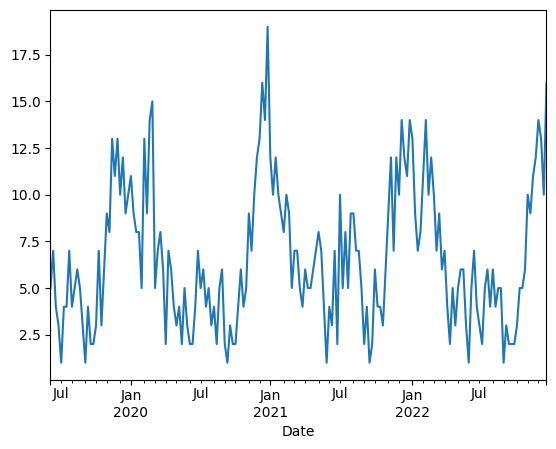

In [30]:
#
temp = df['Quantity']
temp.plot()

In [5]:
#Loading data
df = pd.read_csv('sale/sale(refine).csv')

In [6]:
df

,Date,Quantity
0,2022/8/25,3
1,2022/8/25,2
2,2022/8/25,3
3,2022/8/25,2
4,2022/8/30,1
...,...,...
201,2023/6/10,3
202,2023/6/13,1
203,2023/6/15,1
204,2023/6/15,3


In [9]:
from datetime import datetime

# Define a function to convert the date string to a datetime object
def convert_to_datetime(date_str):
    return datetime.strptime(date_str, '%Y/%m/%d')

# Apply the conversion function to each value in the 'Date' column
df['DAY'] = df['Date'].apply(convert_to_datetime)

# Convert the datetime objects to the day of the week (full name)
df['DAY'] = df['DAY'].dt.strftime('%A')

print(df)


          Date  Quantity       DAY
0    2022/8/25         3  Thursday
1    2022/8/25         2  Thursday
2    2022/8/25         3  Thursday
3    2022/8/25         2  Thursday
4    2022/8/30         1   Tuesday
..         ...       ...       ...
201  2023/6/10         3  Saturday
202  2023/6/13         1   Tuesday
203  2023/6/15         1  Thursday
204  2023/6/15         3  Thursday
205  2023/6/16         1    Friday

[206 rows x 3 columns]


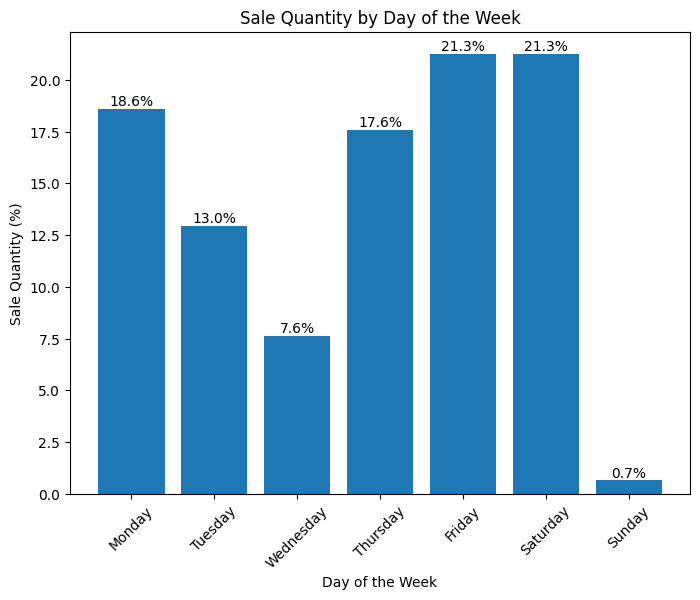

In [18]:
# Assuming you have a DataFrame 'df' with a 'DAY' column representing the day of the week and a 'Quantity' column representing the sale quantity

# Group the data by the day of the week and calculate the sum of the sale quantities for each day
weekly_sales = df.groupby('DAY')['Quantity'].sum()

# Define the order of the weekdays for plotting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the data by the order of weekdays
weekly_sales = weekly_sales.reindex(weekday_order)

# Calculate the total sum of sale quantities
total_sales = weekly_sales.sum()

# Convert the sale quantities to percentages
weekly_sales_percentage = (weekly_sales / total_sales) * 100

# Plot the sale quantity percentages for each day of the week
plt.figure(figsize=(8, 6))
bars = plt.bar(weekly_sales_percentage.index, weekly_sales_percentage)
plt.xlabel('Day of the Week')
plt.ylabel('Sale Quantity (%)')
plt.title('Sale Quantity by Day of the Week')
plt.xticks(rotation=45)

# Add the sale quantity percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.show()